In [1]:
#load the required packages

%matplotlib inline  

import numpy as np
import scipy as sp
import matplotlib.pyplot as plt

import sklearn
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier
from sklearn.decomposition import PCA
import sklearn.metrics as skm
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets



In [2]:
#fix your ID ("numero di matricola") and the seed for random generator (as usual you can try different seeds)
ID = 123456789
np.random.seed(ID)

In [3]:
# import some data to play with
iris = datasets.load_iris()
# Take the first two features. We could avoid this by using a two-dim dataset
X = iris.data
y = iris.target

In [4]:
# Random permute the data and split into training and test taking the first 600
# data samples as training and 4000 samples as test
permutation = np.random.permutation(X.shape[0])

X = X[permutation]
y = y[permutation]

m_training = 100 #small because could take time to do k-fold cv (if powerful pc use a larger number)
m_test = 50

#why m_training<m_test? #small because could take time to do k-fold cv (if powerful pc use a larger number)

X_train, X_test = X[:m_training], X[m_training:m_training+m_test:]
y_train, y_test = y[:m_training], y[m_training:m_training+m_test:]

print(X_train[0])
print(X_train[0].shape)
print(X_train.shape)


labels, freqs = np.unique(y_train, return_counts=True)
print("Labels in training dataset: ", labels)
print("Frequencies in training dataset: ", freqs)

[5.5 2.4 3.7 1. ]
(4,)
(100, 4)
Labels in training dataset:  [0 1 2]
Frequencies in training dataset:  [36 31 33]


In [5]:
#import SVC #rember use 
from sklearn.svm import SVC
#import for Cross-Validation
from sklearn.model_selection import GridSearchCV

# parameters for linear SVM
parameters = {'C': [0.01, 0.1, 1 , 10]}


#train linear SVM

svc = SVC(kernel='linear')


grid = GridSearchCV(svc, parameters, cv=4)

grid.fit(X_train,y_train)



print ('RESULTS FOR LINEAR KERNEL')

print("Best parameters set found:")
print(grid.best_params_)
c=grid.best_params_['C']



print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_)

RESULTS FOR LINEAR KERNEL
Best parameters set found:
{'C': 1}
Score with best parameters:
0.98
All scores on the grid:
{'mean_fit_time': array([0.0011729 , 0.00068963, 0.00125825, 0.00129932]), 'std_fit_time': array([6.02278424e-04, 7.55936363e-05, 5.08448471e-04, 4.75390127e-04]), 'mean_score_time': array([0.00045919, 0.00040078, 0.00187975, 0.0006575 ]), 'std_score_time': array([1.79332854e-04, 9.17237827e-05, 2.19867746e-03, 2.20458969e-04]), 'param_C': masked_array(data=[0.01, 0.1, 1, 10],
             mask=[False, False, False, False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01}, {'C': 0.1}, {'C': 1}, {'C': 10}], 'split0_test_score': array([0.84, 0.96, 1.  , 1.  ]), 'split1_test_score': array([0.84, 0.92, 1.  , 1.  ]), 'split2_test_score': array([0.8 , 0.96, 0.96, 0.96]), 'split3_test_score': array([0.92, 0.96, 0.96, 0.96]), 'mean_test_score': array([0.85, 0.95, 0.98, 0.98]), 'std_test_score': array([0.04358899, 0.01732051, 0.02      , 0.02      ]), 'r

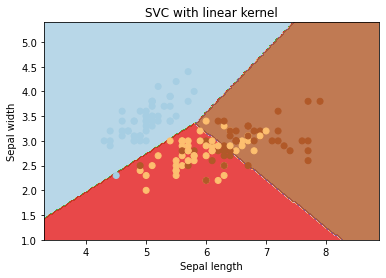

In [6]:
svc = SVC(C=c, kernel='linear')

svc.fit(X_train[:,:2], y_train)

# create a mesh to plot i
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [7]:
svc = SVC(C=c, kernel='linear')

svc.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

y_pred=svc.predict(X_test)
confusion_SVM = confusion_matrix(y_test, y_pred, u)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )
print("\n diag of Confusion matrix SVM  \n \n", np.diag(confusion_SVM /counts[:,None]))






Labels and frequencies in test set:  [14 19 17]

 Confusion matrix SVM  
 
 [[14  0  0]
 [ 0 18  1]
 [ 0  0 17]]

 Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.  ]
 [0.   0.95 0.05]
 [0.   0.   1.  ]]

 diag of Confusion matrix SVM  
 
 [1.   0.95 1.  ]


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [8]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

degree=2

svc = SVC(kernel='poly', degree=2)

grid = GridSearchCV(svc, parameters, cv=4)

grid.fit(X_train,y_train)



print (f'RESULTS FOR POLYNOMIAL KERNEL OF DEGREE {degree}')

print("Best parameters set found:")
print(grid.best_params_)
c=grid.best_params_['C']
g=grid.best_params_['gamma']


print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_)

RESULTS FOR POLYNOMIAL KERNEL OF DEGREE 2
Best parameters set found:
{'C': 0.01, 'gamma': 1}
Score with best parameters:
0.98
All scores on the grid:
{'mean_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1, 0.01, 0.1, 1, 0.01, 0.1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01, 'gamma': 0.01}, {'C': 0.01, 'gamma': 0.1}, {'C': 0.01, 'gamma': 1}, {'C': 0.1, 'gamma': 0.01}, {'C': 0.1, 'gamma': 0.1}, {

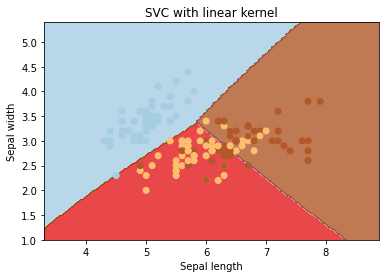

In [9]:
svc = SVC(C=c, kernel='poly', degree=2, gamma=g)

svc.fit(X_train[:,:2], y_train)

# create a mesh to plot i
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [10]:
svc = SVC(C=c, kernel='poly', degree=2, gamma=g)

svc.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

y_pred=svc.predict(X_test)
confusion_SVM = confusion_matrix(y_test, y_pred, u)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )
print("\n diag of Confusion matrix SVM  \n \n", np.diag(confusion_SVM /counts[:,None]))





Labels and frequencies in test set:  [14 19 17]

 Confusion matrix SVM  
 
 [[14  0  0]
 [ 0 18  1]
 [ 0  1 16]]

 Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.  ]
 [0.   0.95 0.05]
 [0.   0.06 0.94]]

 diag of Confusion matrix SVM  
 
 [1.   0.95 0.94]


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [11]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

degree=3

svc = SVC(kernel='poly', degree=3)

grid = GridSearchCV(svc, parameters, cv=4)

grid.fit(X_train,y_train)



print (f'RESULTS FOR POLYNOMIAL KERNEL OF DEGREE {degree}')

print("Best parameters set found:")
print(grid.best_params_)
c=grid.best_params_['C']
g=grid.best_params_['gamma']


print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_)

RESULTS FOR POLYNOMIAL KERNEL OF DEGREE 3
Best parameters set found:
{'C': 0.1, 'gamma': 0.1}
Score with best parameters:
0.98
All scores on the grid:
{'mean_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1, 0.01, 0.1, 1, 0.01, 0.1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01, 'gamma': 0.01}, {'C': 0.01, 'gamma': 0.1}, {'C': 0.01, 'gamma': 1}, {'C': 0.1, 'gamma': 0.01}, {'C': 0.1, 'gamma': 0.1}, 

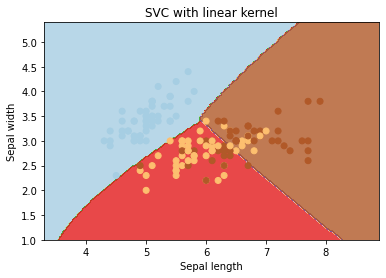

In [12]:
svc = SVC(C=c, kernel='poly', degree=3, gamma=g)

svc.fit(X_train[:,:2], y_train)

# create a mesh to plot i
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [13]:
svc = SVC(C=c, kernel='poly', degree=3, gamma=g)

svc.fit(X_train, y_train)


from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

y_pred=svc.predict(X_test)
confusion_SVM = confusion_matrix(y_test, y_pred, u)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )
print("\n diag of Confusion matrix SVM  \n \n", np.diag(confusion_SVM /counts[:,None]))




Labels and frequencies in test set:  [14 19 17]

 Confusion matrix SVM  
 
 [[14  0  0]
 [ 0 18  1]
 [ 0  2 15]]

 Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.  ]
 [0.   0.95 0.05]
 [0.   0.12 0.88]]

 diag of Confusion matrix SVM  
 
 [1.   0.95 0.88]


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "


In [14]:
# parameters for poly with degree 2 kernel
parameters = {'C': [0.01, 0.1, 1],'gamma':[0.01,0.1,1]}

#run SVM with poly of degree 2 kernel

degree=0

svc = SVC(kernel='rbf')

grid = GridSearchCV(svc, parameters, cv=4)

grid.fit(X_train,y_train)



print (f'RESULTS FOR POLYNOMIAL KERNEL OF DEGREE {degree}')

print("Best parameters set found:")
print(grid.best_params_)
c=grid.best_params_['C']
g=grid.best_params_['gamma']


print("Score with best parameters:")
print(grid.best_score_)

print("All scores on the grid:")
print(grid.cv_results_)

RESULTS FOR POLYNOMIAL KERNEL OF DEGREE 0
Best parameters set found:
{'C': 1, 'gamma': 1}
Score with best parameters:
0.97
All scores on the grid:
{'mean_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'std_fit_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'mean_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'std_score_time': array([0., 0., 0., 0., 0., 0., 0., 0., 0.]), 'param_C': masked_array(data=[0.01, 0.01, 0.01, 0.1, 0.1, 0.1, 1, 1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'param_gamma': masked_array(data=[0.01, 0.1, 1, 0.01, 0.1, 1, 0.01, 0.1, 1],
             mask=[False, False, False, False, False, False, False, False,
                   False],
       fill_value='?',
            dtype=object), 'params': [{'C': 0.01, 'gamma': 0.01}, {'C': 0.01, 'gamma': 0.1}, {'C': 0.01, 'gamma': 1}, {'C': 0.1, 'gamma': 0.01}, {'C': 0.1, 'gamma': 0.1}, {'C'

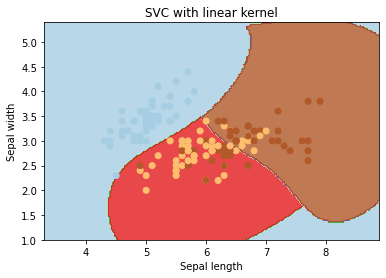

In [15]:
svc = SVC(C=c, kernel='rbf', gamma=g)

svc.fit(X_train[:,:2], y_train)

# create a mesh to plot i
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
h = (x_max / x_min)/100
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
 np.arange(y_min, y_max, h))

plt.subplot(1, 1, 1)
Z = svc.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)
plt.contourf(xx, yy, Z, cmap=plt.cm.Paired, alpha=0.8)

plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Paired)
plt.xlabel('Sepal length')
plt.ylabel('Sepal width')
plt.xlim(xx.min(), xx.max())
plt.title('SVC with linear kernel')
plt.show()

In [16]:
svc = SVC(C=c, kernel='rbf', gamma=g)

svc.fit(X_train, y_train)

from sklearn.metrics import confusion_matrix
np.set_printoptions(precision=2, suppress=True) # for better aligned printing of confusion matrix use floatmode='fixed'

u, counts = np.unique(y_test, return_counts=True)
print("Labels and frequencies in test set: ", counts)

y_pred=svc.predict(X_test)
confusion_SVM = confusion_matrix(y_test, y_pred, u)
print("\n Confusion matrix SVM  \n \n", confusion_SVM)
print("\n Confusion matrix SVM (normalized)   \n \n", confusion_SVM /counts[:,None] )
print("\n diag of Confusion matrix SVM  \n \n", np.diag(confusion_SVM /counts[:,None]))



Labels and frequencies in test set:  [14 19 17]

 Confusion matrix SVM  
 
 [[14  0  0]
 [ 0 18  1]
 [ 0  2 15]]

 Confusion matrix SVM (normalized)   
 
 [[1.   0.   0.  ]
 [0.   0.95 0.05]
 [0.   0.12 0.88]]

 diag of Confusion matrix SVM  
 
 [1.   0.95 0.88]


/Users/filippoboni/opt/anaconda3/lib/python3.8/site-packages/sklearn/utils/validation.py:70: FutureWarning: Pass labels=[0 1 2] as keyword args. From version 1.0 (renaming of 0.25) passing these as positional arguments will result in an error
  warnings.warn(f"Pass {args_msg} as keyword args. From version "
